## **Problem Statement**
- Have to predict investement failure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [21]:
train = pd.read_csv(r'D:\Uzair\Programming\Python\Day.1.Classification\train_data.csv')

In [22]:
train.head()

,Investor_ID,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor,Investment_Failed
0,0003HW9UAA,51.0,NaN,87300.0,358,13,3.0,18.10,12,0.85,Bachelor's,Part-time,NaN,No,NO,Other,True,0
1,000ELHLBPV,37.0,81658.0,152598.0,792,23,4.0,14.06,24,0.86,PhD,Self-employed,NaN,Yes,No,Auto,False,1
2,000G6CHJON,NaN,NaN,77767.0,359,57,4.0,4.31,60,0.60,Master's,Unemployed,Married,No,No,Education,True,0
3,000K09D0JB,54.0,42344.0,13261.0,366,115,1.0,NaN,60,0.21,PhD,Part-time,Divorced,No,No,Education,True,0
4,000NTH4YTU,63.0,48898.0,193990.0,792,53,4.0,5.65,48,0.82,Master's,Self-employed,Married,Yes,No,Business,True,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225347 entries, 0 to 225346
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Investor_ID                     225347 non-null  object 
 1   Age                             192507 non-null  float64
 2   Annual_Income                   202721 non-null  float64
 3   Investment_Amount               207314 non-null  float64
 4   Risk_Tolerance_Score            225347 non-null  int64  
 5   Months_of_Investing_Experience  225347 non-null  int64  
 6   Number_of_Active_Investments    220835 non-null  float64
 7   Potential_Return_Rate           214103 non-null  float64
 8   Investment_Duration             225347 non-null  int64  
 9   Investment_to_Income_Ratio      225347 non-null  float64
 10  Education                       225347 non-null  object 
 11  Employment_Status               225347 non-null  object 
 12  Marital_Status  

In [24]:
train.shape

(225347, 18)

### Information we get from the data
* 225347 rows
* 18 columns
* 8 columns we have object
* 6 columns we have float
* 4 columns we have int

### Data Preprocessing

In [25]:
train.describe()

,Age,Annual_Income,Investment_Amount,Risk_Tolerance_Score,Months_of_Investing_Experience,Number_of_Active_Investments,Potential_Return_Rate,Investment_Duration,Investment_to_Income_Ratio,Investment_Failed
count,192507.000000,202721.000000,207314.000000,225347.000000,225347.000000,220835.000000,214103.000000,225347.000000,225347.000000,225347.000000
mean,46.026004,82793.709196,126997.235204,598.569708,59.832942,2.498413,13.417184,36.028756,0.499736,0.087212
std,19.066572,38856.728908,70766.875540,186.348988,34.617474,1.116728,6.628983,16.968128,0.230821,0.282146
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,49293.000000,65589.250000,445.000000,30.000000,2.000000,7.700000,24.000000,0.300000,0.000000
50%,45.000000,82908.000000,126790.500000,589.000000,60.000000,2.000000,13.350000,36.000000,0.500000,0.000000
75%,58.000000,116369.000000,188104.500000,735.000000,90.000000,3.000000,19.160000,48.000000,0.700000,0.000000
max,119.000000,149999.000000,249999.000000,1099.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [26]:
train.describe(include='O')

,Investor_ID,Education,Employment_Status,Marital_Status,Owns_Property,Has_Dependents,Investment_Sector,Has_Investment_Advisor
count,225347,225347,225347,182441,225347,225347,225347,221498
unique,225347,4,9,6,11,11,5,2
top,0003HW9UAA,Bachelor's,Part-time,Divorced,No,No,Home,True
freq,1,56748,52525,39174,94232,88990,45381,110975


In [27]:
train.isnull().sum()  #checking missing values

Investor_ID                           0
Age                               32840
Annual_Income                     22626
Investment_Amount                 18033
Risk_Tolerance_Score                  0
Months_of_Investing_Experience        0
Number_of_Active_Investments       4512
Potential_Return_Rate             11244
Investment_Duration                   0
Investment_to_Income_Ratio            0
Education                             0
Employment_Status                     0
Marital_Status                    42906
Owns_Property                         0
Has_Dependents                        0
Investment_Sector                     0
Has_Investment_Advisor             3849
Investment_Failed                     0
dtype: int64

In [28]:
train.Marital_Status.isnull().sum()/train.shape[0]  #checking percentage of missing values

0.19039969469307336

Maximum 20% of data is empty

## Separation of Categorical (discrete) or Numerical (Contnious)

In [29]:
# Checking Categorical Features in dataset and counting it

cat_features = [columns_name for columns_name in train.columns if train[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))

Number of Categorical Features we have in data is : 8  
Here is Listed features ['Investor_ID', 'Education', 'Employment_Status', 'Marital_Status', 'Owns_Property', 'Has_Dependents', 'Investment_Sector', 'Has_Investment_Advisor'] 


In [30]:
# Checking Numerical Features in dataset and counting it

num_features = [columns_name for columns_name in train.columns if train[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))

Number of Numerical Features we have in data is : 10  
Here is the Listed Numerical features ['Age', 'Annual_Income', 'Investment_Amount', 'Risk_Tolerance_Score', 'Months_of_Investing_Experience', 'Number_of_Active_Investments', 'Potential_Return_Rate', 'Investment_Duration', 'Investment_to_Income_Ratio', 'Investment_Failed'] 


## Checking Cardinality of Data
* number of unique vaues in cardinality could be
* if there are more unique values then it is hard to do label encoding
* also effect on the efficiency of the model

In [31]:
for i  in cat_features:
  count = len(train[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

# hence the unqiue value in  date column is very large, Thus
# Cardinality of Data is high which poses several problem to the model in terms of efficiency
# because we need to do numerical encoding or create dummies

The Cardinality of each column Investor_ID : 225347 
The Cardinality of each column Education : 4 
The Cardinality of each column Employment_Status : 9 
The Cardinality of each column Marital_Status : 7 
The Cardinality of each column Owns_Property : 11 
The Cardinality of each column Has_Dependents : 11 
The Cardinality of each column Investment_Sector : 5 
The Cardinality of each column Has_Investment_Advisor : 3 


## Handling Missing values

### For Categorical Values

In [32]:
categorical_features = [column_name for column_name in train.columns if train[column_name].dtype =="O"]

In [33]:
categorical_features    # now we have the features othe than date

['Investor_ID',
 'Education',
 'Employment_Status',
 'Marital_Status',
 'Owns_Property',
 'Has_Dependents',
 'Investment_Sector',
 'Has_Investment_Advisor']

In [34]:
missing_cat = train[categorical_features].isnull().sum() # Total missing values
print(missing_cat)

Investor_ID                   0
Education                     0
Employment_Status             0
Marital_Status            42906
Owns_Property                 0
Has_Dependents                0
Investment_Sector             0
Has_Investment_Advisor     3849
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Investor_ID'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Employment_Status'),
  Text(3, 0, 'Marital_Status'),
  Text(4, 0, 'Owns_Property'),
  Text(5, 0, 'Has_Dependents'),
  Text(6, 0, 'Investment_Sector'),
  Text(7, 0, 'Has_Investment_Advisor')])

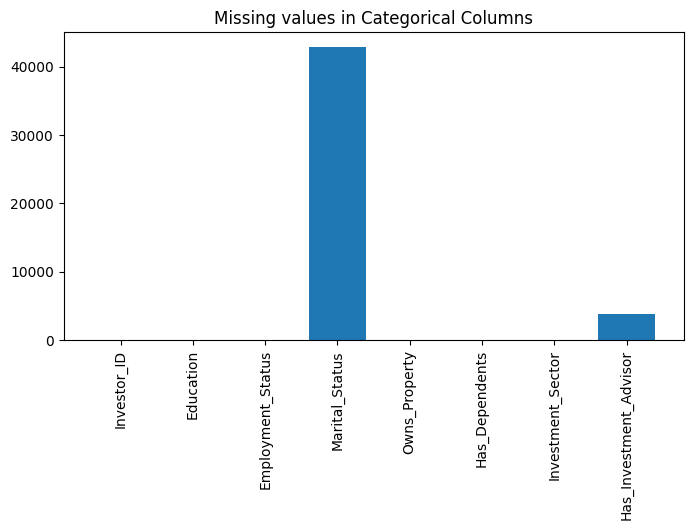

In [35]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # by visualization we can see that winDir3pm has large number of missing values
plt.title("Missing values in Categorical Columns")
plt.xticks(rotation = 90)

In [36]:
train['Has_Investment_Advisor'].fillna(train['Has_Investment_Advisor'].mode()[0])

C:\Users\Uzair\AppData\Local\Temp\ipykernel_13884\3557357769.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Has_Investment_Advisor'].fillna(train['Has_Investment_Advisor'].mode()[0])


0          True
1         False
2          True
3          True
4          True
          ...  
225342    False
225343    False
225344    False
225345    False
225346    False
Name: Has_Investment_Advisor, Length: 225347, dtype: bool

### For Numerical Columns

In [37]:
train.drop(columns=['Investor_ID'],inplace=True)

In [38]:
train.Number_of_Active_Investments.ffill(inplace=True)

C:\Users\Uzair\AppData\Local\Temp\ipykernel_13884\1175729712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Number_of_Active_Investments.ffill(inplace=True)


In [39]:
train.isnull().sum()

Age                               32840
Annual_Income                     22626
Investment_Amount                 18033
Risk_Tolerance_Score                  0
Months_of_Investing_Experience        0
Number_of_Active_Investments          0
Potential_Return_Rate             11244
Investment_Duration                   0
Investment_to_Income_Ratio            0
Education                             0
Employment_Status                     0
Marital_Status                    42906
Owns_Property                         0
Has_Dependents                        0
Investment_Sector                     0
Has_Investment_Advisor             3849
Investment_Failed                     0
dtype: int64

#### Checking Correlation of Columns having null values to decide whether to remove them or not

In [44]:
#Encoding target Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Investment_Failed'] = le.fit_transform(train['Has_Investment_Advisor'])

In [48]:
num_features.pop()

'Investment_Failed'

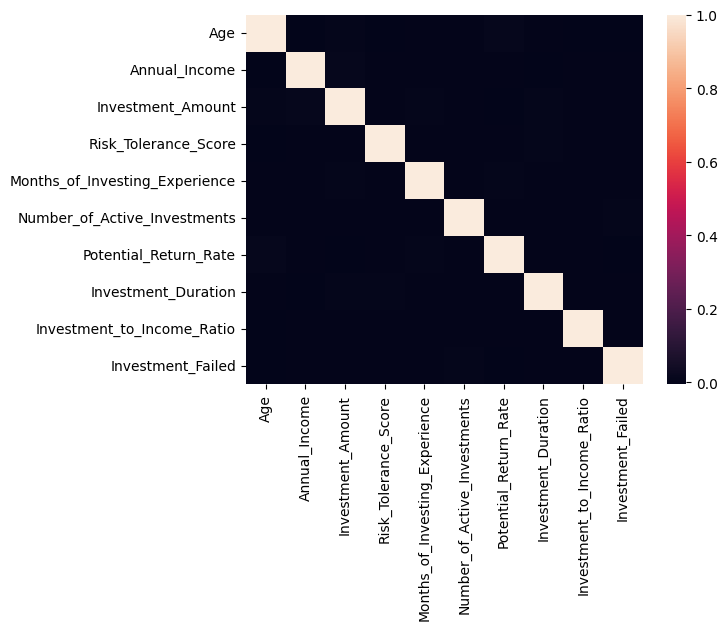

In [49]:
sns.heatmap(train[num_features].corr())
plt.show()

This proves us that there is no correlation between Age and Investement Failed. Therefore, dropping the whole column

In [50]:
train.drop(columns=['Age'],inplace=True)    # Age is not highly correlated with Investment_Failed

##### Filling Missing Values in Amount Income and Investment Amount

In [51]:
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame and 'Annual_Income' and 'Investment_Amount' are columns
# Replace NaN values with np.nan
train['Annual_Income'].replace('', np.nan, inplace=True)
train['Investment_Amount'].replace('', np.nan, inplace=True)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Apply the imputer
train[['Annual_Income', 'Investment_Amount']] = imputer.fit_transform(train[['Annual_Income', 'Investment_Amount']])

C:\Users\Uzair\AppData\Local\Temp\ipykernel_13884\3915587855.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Annual_Income'].replace('', np.nan, inplace=True)
C:\Users\Uzair\AppData\Local\Temp\ipykernel_13884\3915587855.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.
